<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-30-CNN/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
image = np.vstack([np.zeros((2,5)), np.ones((3,5))])

kernel = np.array([
                   [1 , 2],
                   [-1, -2]
], dtype='float32')

print('Image shape', image.shape)
print('kernel shape', kernel.shape)

Image shape (5, 5)
kernel shape (2, 2)


In [27]:
images = np.array([image, image])
images = images.reshape(2, 5, 5, 1)
print('Images shape', images.shape)

kernels = kernel.reshape(2, 2, 1, 1)
print('kernel shape', kernels.shape)

Images shape (2, 5, 5, 1)
kernel shape (2, 2, 1, 1)


convolution operation

In [28]:
image_edges = tf.nn.conv2d(
    input=images,
    filters=kernels,
    strides=1,
    padding='VALID'
)

In [29]:
image_edges[0].numpy().reshape(4, 4)

array([[ 0.,  0.,  0.,  0.],
       [-3., -3., -3., -3.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

# Convolve Image

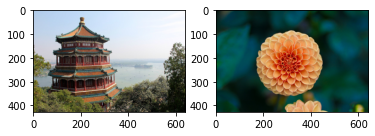

In [32]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg')/ 255

plt.subplot(1, 2, 1)
plt.imshow(china)

plt.subplot(1, 2, 2)
plt.imshow(flower)

Shape (2, 427, 640, 3)
(5, 5, 3, 1) float64
image_output shape (2, 423, 636, 1)


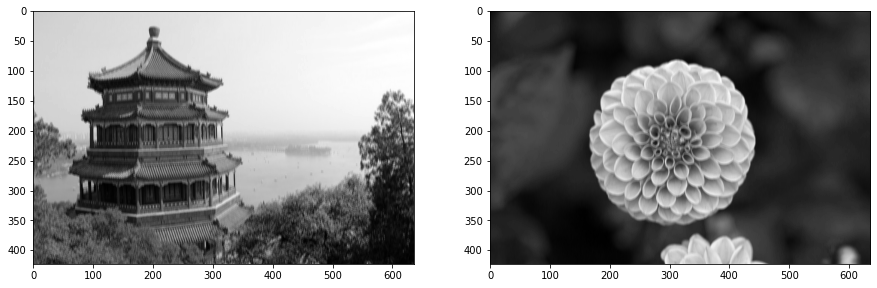

In [45]:
images = np.array([china, flower])
print('Shape', images.shape)
batch, height, width, channels = images.shape

K=1
filters = np.zeros((5,5, channels, K))
filters[:, 3, :, 0] = 1
# filters[3, :, :, 1] = 1

print(filters.shape, filters.dtype)

image_output = tf.nn.conv2d(
    input=images,
    filters=filters,
    strides=1,
    padding='VALID'
)

print('image_output shape', image_output.shape)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(image_output[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(image_output[1, :, :, 0], cmap='gray')

# Sobel Kernel

https://en.wikipedia.org/wiki/Sobel_operator

(225, 300, 3)


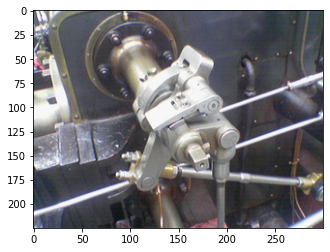

In [47]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Valve_original_%281%29.PNG/300px-Valve_original_%281%29.PNG'

file_path = tf.keras.utils.get_file(origin = url)
image = tf.io.read_file(file_path)
image = tf.io.decode_jpeg(image, channels=3)

print(image.shape)

plt.imshow(image)

In [51]:
images = tf.reshape(image, [1, *image.shape])/255
batch, height, width, channels = images.shape

sobel = np.array([
                  [1., 2., 1],
                  [0, 0, 0],
                  [-1, -2, -1],
])
k=2
filters = np.zeros((3, 3, channels, k))
filters[:, :, :, 0] = sobel
filters[:, :, :, 1] = np.transpose(sobel)

In [52]:
image_output = tf.nn.conv2d(
    input=images,
    filters=filters,
    strides=1,
    padding='VALID',
)
print(image_output.shape)

(1, 223, 298, 2)


output shape (223, 298)


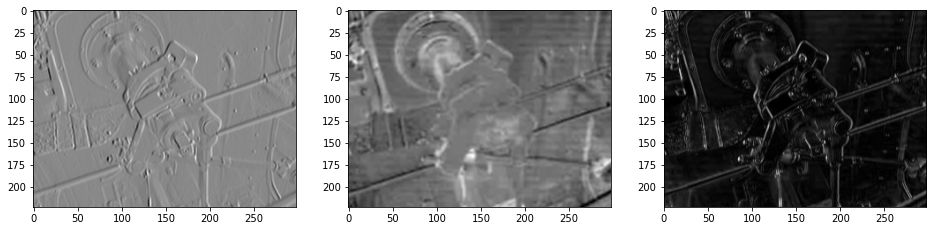

In [62]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_output[0, :, :, 0], cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(image_output[0, :, :, 1], cmap='gray')

# output = tf.math.reduce_sum(image_output, axis=3, keepdims=False)
output = np.sqrt((image_output[0, :, :, 0]**2 + image_output[0, :, :, 1]**2).numpy())
print('output shape', output.shape)

plt.subplot(1, 3, 3)
plt.imshow(output, cmap='gray')